In [1]:
import sys
sys.path.insert(0, '../scripts')
from load_data_df import *

# Plotting Modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Paths

In [2]:
# AES
aes_data_dir   = '/Users/ti27457/Repos/ttb/circuits/aes'
# aes_data_dir = '/Volumes/TI27457/ttb/circuits/aes-logs-50tests-100res-100ps'
# aes_data_dir = '/Volumes/TI27457/ttb/circuits/aes-logs-100tests-100res-100ps'

# UART
uart_data_dir = '/Users/ti27457/Repos/ttb/circuits/uart'
# uart_data_dir = '/Volumes/TI27457/ttb/circuits/uart-logs-1tests-10000res-100ps'

# OR1200

# Load Data

In [3]:
# AES
aes_counter_df    = load_data_df(aes_data_dir)
aes_counter_sizes = load_counter_sizes(aes_data_dir)

# UART
uart_counter_df    = load_data_df(uart_data_dir)
uart_counter_sizes = load_counter_sizes(uart_data_dir)

# OR1200

aes.2100.json
aes.4200.json
aes.3300.json
aes.200.json
aes.5000.json
aes.7800.json
aes.6600.json
aes.1700.json
aes.7400.json
aes.11900.json
aes.10700.json
aes.11500.json
aes.14000.json
aes.8700.json
aes.9900.json
aes.12300.json
aes.9500.json
aes.13100.json
aes.11700.json
aes.10900.json
aes.10500.json
aes.8900.json
aes.13300.json
aes.9700.json
aes.12100.json
aes.14200.json
aes.8500.json
aes.5200.json
aes.3100.json
aes.4000.json
aes.2300.json
aes.7600.json
aes.1500.json
aes.6800.json
aes.1900.json
aes.6400.json
aes.12500.json
aes.0.json
aes.14600.json
aes.8100.json
aes.13700.json
aes.12900.json
aes.9300.json
aes.10100.json
aes.11300.json
aes.6000.json
aes.7200.json
aes.1100.json
aes.4400.json
aes.800.json
aes.3900.json
aes.2700.json
aes.5600.json
aes.4800.json
aes.400.json
aes.3500.json
aes.1300.json
aes.7000.json
aes.6200.json
aes.600.json
aes.3700.json
aes.5400.json
aes.2900.json
aes.5800.json
aes.2500.json
aes.4600.json
aes.9100.json
aes.13500.json
aes.13900.json
aes.14400.json
aes.83

# Plot Settings

In [4]:
# Plot Settings
FIG_WIDTH            = 12
FIG_HEIGHT           = 6
HIST_SAVE_AS_PDF     = True
AES_FP_SAVE_AS_PDF   = False
UART_FP_SAVE_AS_PDF  = False
HIST_PDF_FILENAME    = 'cntr_sizes_histogram.pdf'
AES_FP_PDF_FILENAME  = 'aes-100tests-100res-100ps-2x.pdf'
UART_FP_PDF_FILENAME = 'uart_false_positives.pdf'

# Plot Counter Size Histogram

Histogram: [  0 344   0  40   0  22]
Bins:      [  0   8  16  32  64 128 256]
Histogram: [92 40  2  2  0  0]
Bins:      [  0   8  16  32  64 128 256]


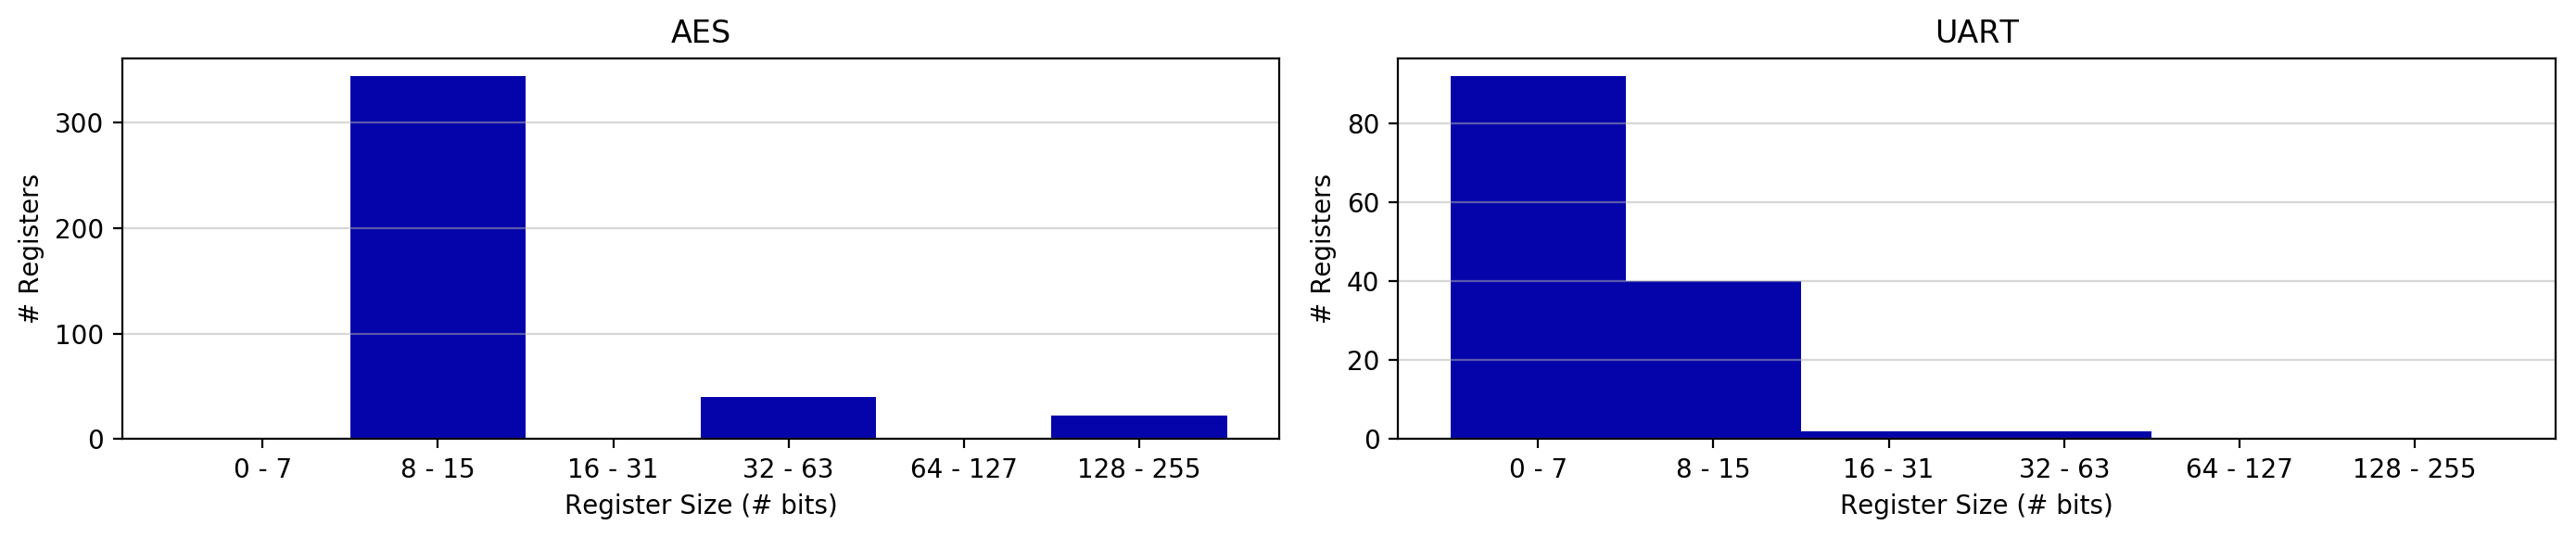

In [5]:
def plt_histogram(data, ax, title):
    bins = [0,8,16,32,64,128,256] # your bins

    # Create Histogram
    hist, bin_edges = np.histogram(data,bins) # make the histogram
    print "Histogram:", hist
    print "Bins:     ", bin_edges

    # Plot Histogram
    ax.bar(\
        range(len(hist)),\
        hist,\
        width      = 1,\
        align      = 'center',\
        tick_label = ['{} - {}'.format(bins[i], bins[i+1]-1) for i,j in enumerate(hist)],
        color      = '#0504aa')

    # Format Histogram
    ax.set_title(title)
    ax.set_xlabel('Register Size (# bits)')
    ax.set_ylabel('# Registers')
    ax.grid(axis='y', alpha=0.5)

# Create Figure
fig, axes = plt.subplots(1, 2, figsize=(14, 3), dpi=200)

# AES Histogram
plt_histogram(aes_counter_sizes['Coalesced Sizes'], axes[0], 'AES')

# UART Histogram
plt_histogram(uart_counter_sizes['Coalesced Sizes'], axes[1], 'UART')

# Save Histogram to PDF
plt.tight_layout(h_pad=1)
if HIST_SAVE_AS_PDF:
    plt.savefig(HIST_PDF_FILENAME, format='pdf')
plt.show()

# Plot AES False Positives

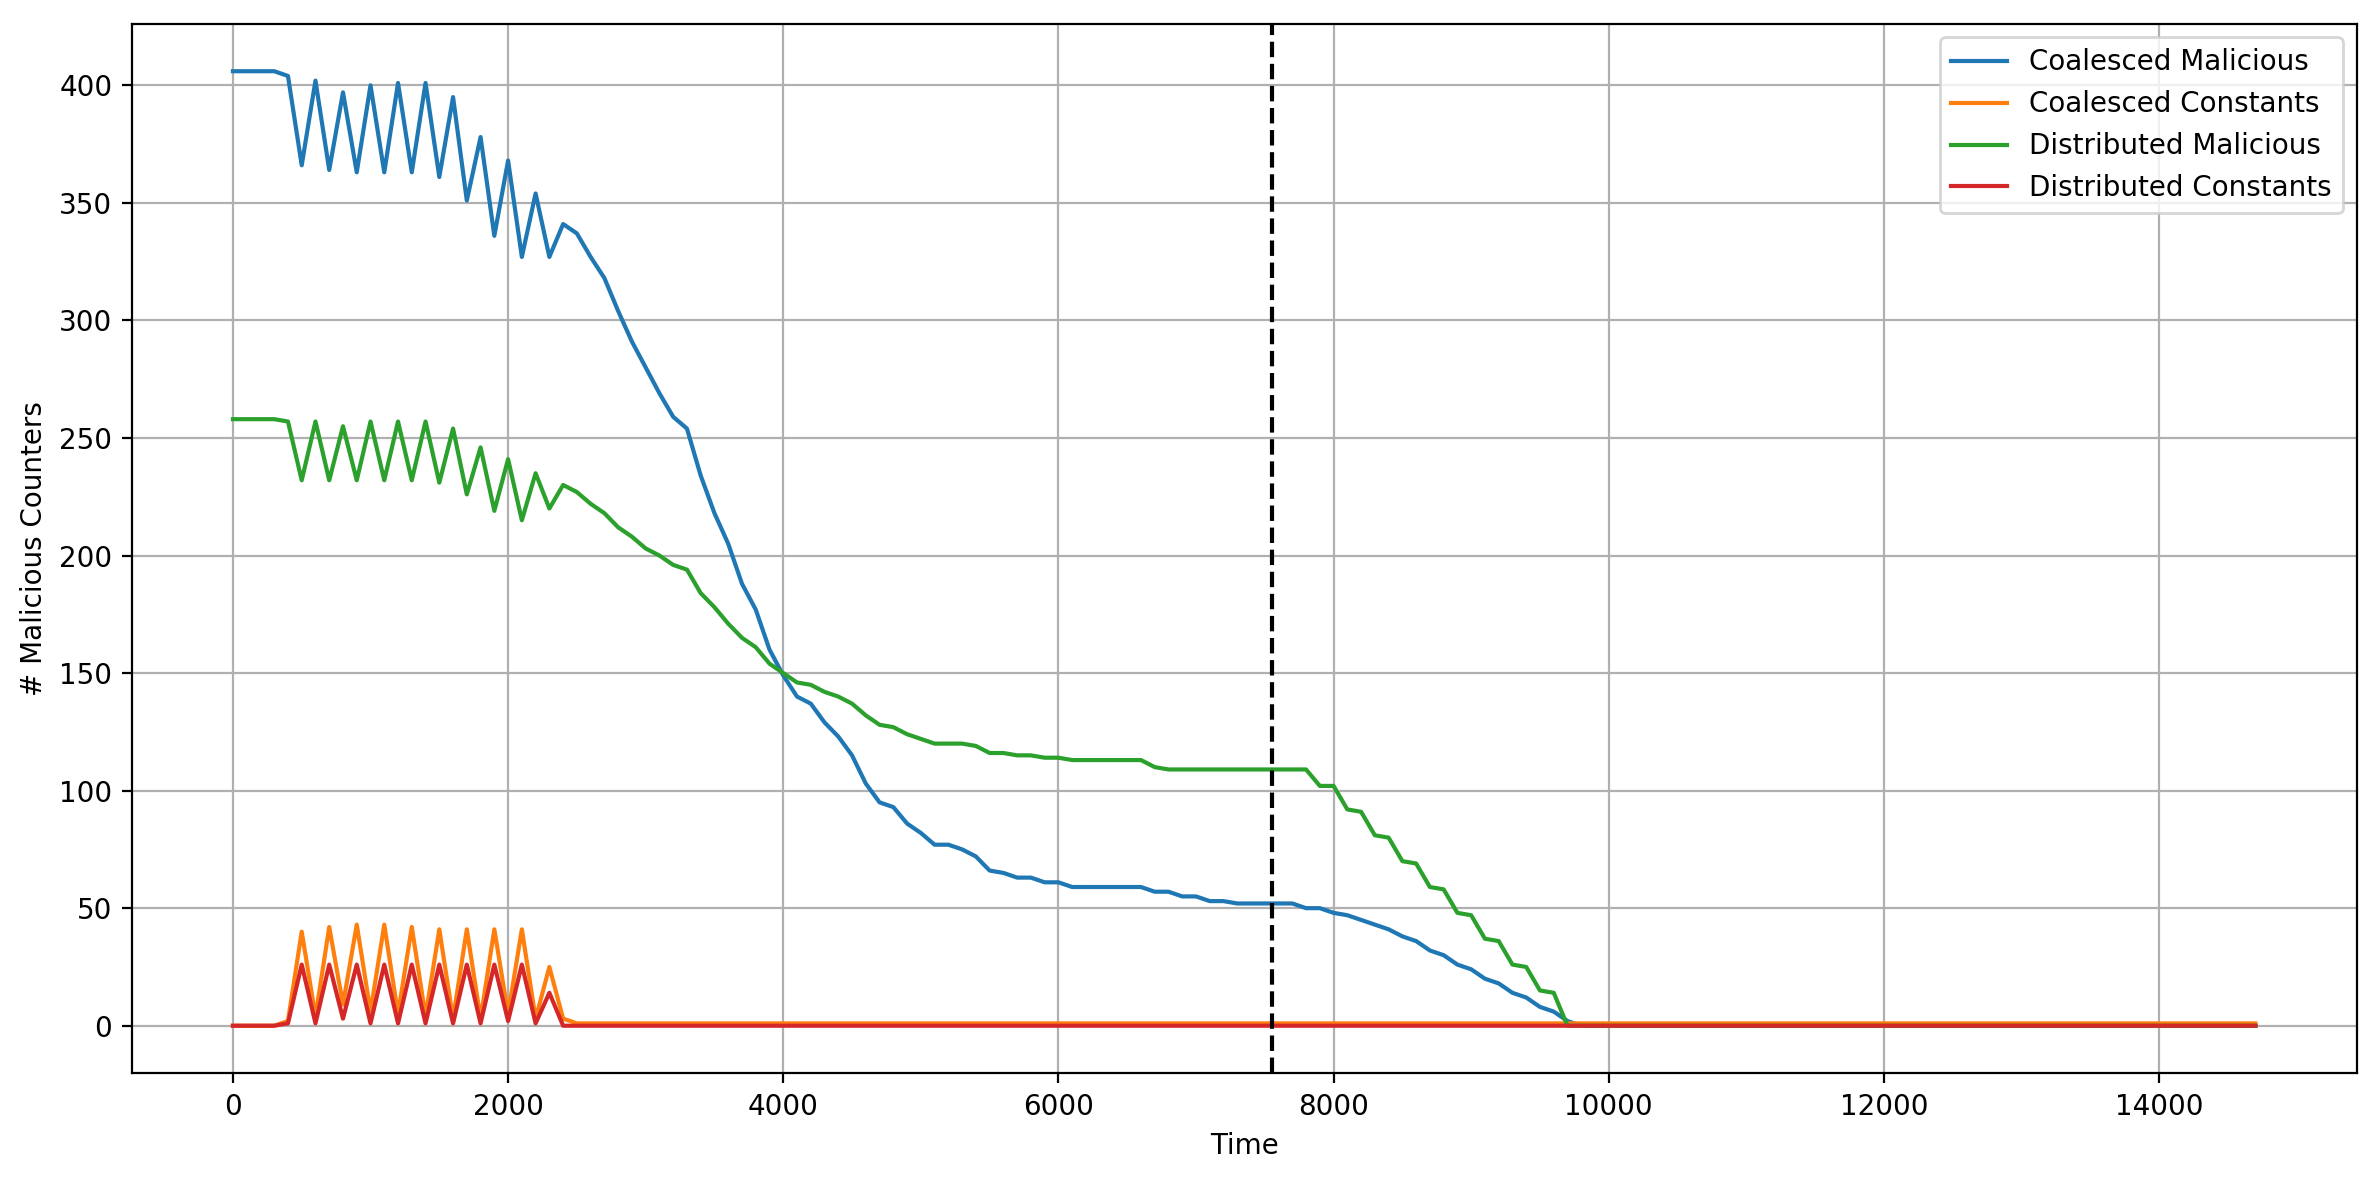

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(FIG_WIDTH, FIG_HEIGHT), dpi=200)

# for i in range(len(axes.flat)):
for i in range(1):
#     ax    = axes.flat[i]
    ax    = axes
    df    = aes_counter_df
    sns.lineplot(x="Time", y="Coalesced Malicious", data=df, ax=ax)
    sns.lineplot(x="Time", y="Coalesced Constants", data=df, ax=ax)
    sns.lineplot(x="Time", y="Distributed Malicious", data=df, ax=ax)
    sns.lineplot(x="Time", y="Distributed Constants", data=df, ax=ax)
    ax.set_ylabel('# Malicious Counters')
    ax.set_xlabel('Time')
    ax.grid()
plt.legend(labels=["Coalesced Malicious", "Coalesced Constants", "Distributed Malicious", "Distributed Constants"])
plt.tight_layout(h_pad=1)

# Scale the plot
# ax.set_xlim(0, 50000)
plt.axvline(x=7550, color='k', linestyle='--')

if AES_FP_SAVE_AS_PDF:
    plt.savefig(AES_FP_PDF_FILENAME, format='pdf')

# Plot UART False Positives

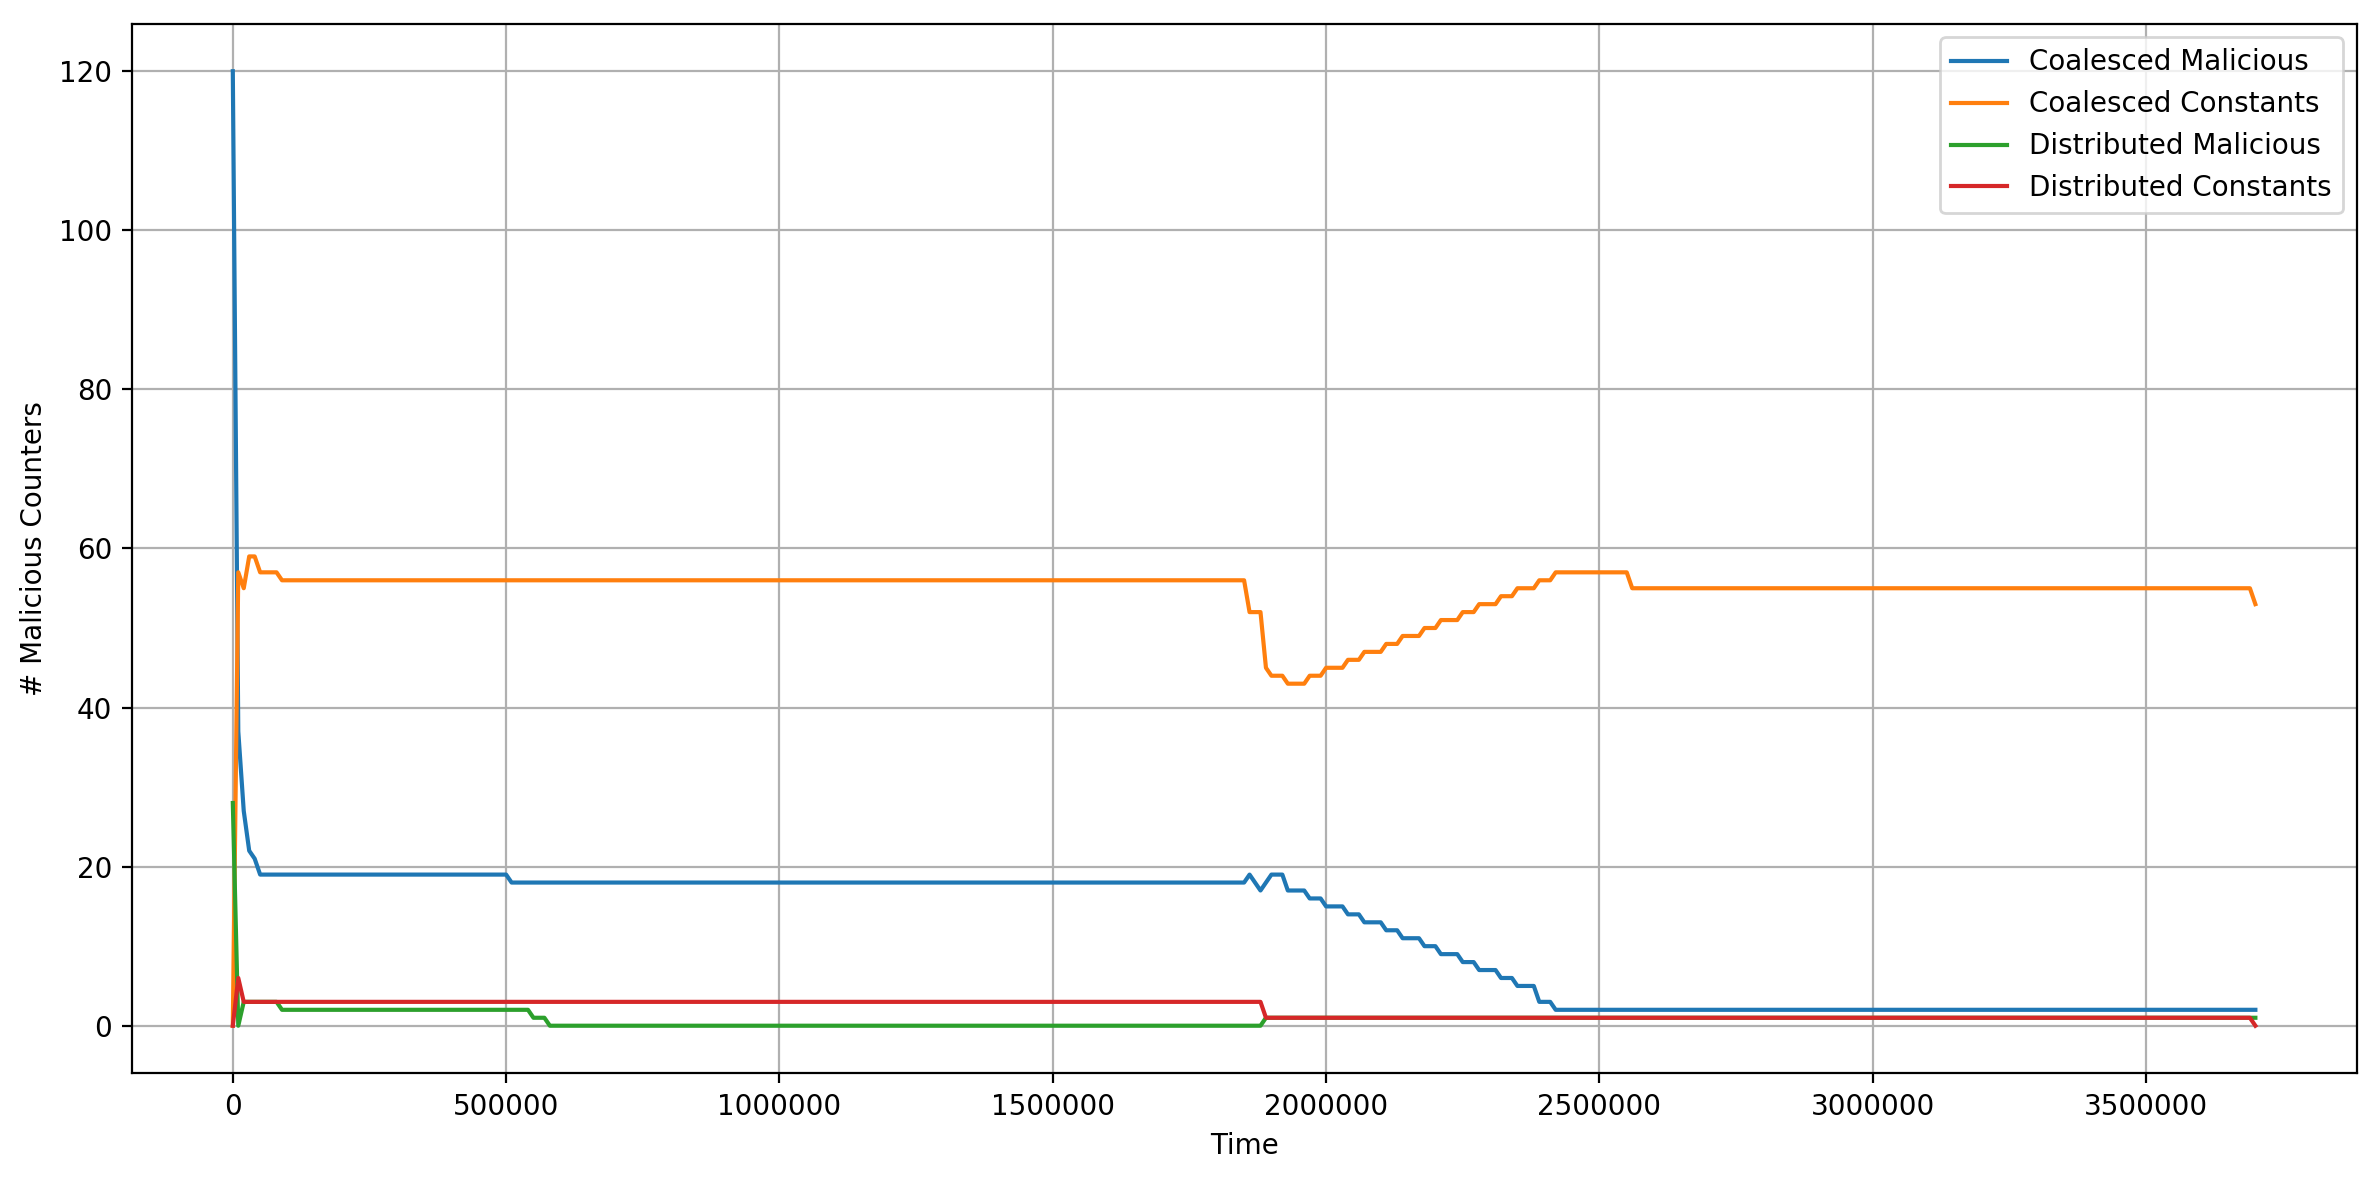

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(FIG_WIDTH, FIG_HEIGHT), dpi=200)

# for i in range(len(axes.flat)):
for i in range(1):
#     ax    = axes.flat[i]
    ax    = axes
    df    = uart_counter_df
    sns.lineplot(x="Time", y="Coalesced Malicious", data=df, ax=ax)
    sns.lineplot(x="Time", y="Coalesced Constants", data=df, ax=ax)
    sns.lineplot(x="Time", y="Distributed Malicious", data=df, ax=ax)
    sns.lineplot(x="Time", y="Distributed Constants", data=df, ax=ax)
    ax.set_ylabel('# Malicious Counters')
    ax.set_xlabel('Time')
    ax.grid()
plt.legend(labels=["Coalesced Malicious", "Coalesced Constants", "Distributed Malicious", "Distributed Constants"])
plt.tight_layout(h_pad=1)

# Scale the plot
# ax.set_xlim(0, 10000000)

if UART_FP_SAVE_AS_PDF:
    plt.savefig(UART_FP_PDF_FILENAME, format='pdf')